In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import time
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
df=pd.read_excel(r"../dataset/data.xlsx",sheet_name="Sheet1")
df

,Number of Storeys(NS),Height of Structure(HS),Number of Spans(HSP),Length of Spans (LS),Opening percentage (OP),Masonry wall Stiffeness Et (MS),Period (P)
0,1,3,2,3.0,0,2.25,0.092970
1,1,3,2,3.0,100,2.25,0.159750
2,1,3,2,4.5,0,2.25,0.094770
3,1,3,2,4.5,100,2.25,0.156589
4,1,3,2,6.0,0,2.25,0.106350
...,...,...,...,...,...,...,...
4021,22,66,6,6.0,50,25.00,1.628000
4022,22,66,6,6.0,75,25.00,2.714000
4023,22,66,6,6.0,100,25.00,2.879000
4024,22,66,6,7.5,0,25.00,0.602680


In [3]:
df.shape

(4026, 7)

In [4]:
df.head()

,Number of Storeys(NS),Height of Structure(HS),Number of Spans(HSP),Length of Spans (LS),Opening percentage (OP),Masonry wall Stiffeness Et (MS),Period (P)
0,1,3,2,3.0,0,2.25,0.092970
1,1,3,2,3.0,100,2.25,0.159750
2,1,3,2,4.5,0,2.25,0.094770
3,1,3,2,4.5,100,2.25,0.156589
4,1,3,2,6.0,0,2.25,0.106350


In [5]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)

normalized_df = pd.DataFrame(normalized_data, columns=df.columns)

print(normalized_df)

      Number of Storeys(NS)  Height of Structure(HS)  Number of Spans(HSP)  \
0                       0.0                      0.0                   0.0   
1                       0.0                      0.0                   0.0   
2                       0.0                      0.0                   0.0   
3                       0.0                      0.0                   0.0   
4                       0.0                      0.0                   0.0   
...                     ...                      ...                   ...   
4021                    1.0                      1.0                   1.0   
4022                    1.0                      1.0                   1.0   
4023                    1.0                      1.0                   1.0   
4024                    1.0                      1.0                   1.0   
4025                    1.0                      1.0                   1.0   

      Length of Spans (LS)  Opening percentage (OP)  \
0       

In [6]:
normalized_df.keys()

Index(['Number of Storeys(NS)', 'Height of Structure(HS)',
       'Number of Spans(HSP)', 'Length of Spans (LS)',
       'Opening percentage (OP)', 'Masonry wall Stiffeness Et (MS)',
       'Period (P)'],
      dtype='object')

In [7]:
X=normalized_df.drop("Period (P)" ,axis=1)

In [8]:
y=normalized_df["Period (P)"]

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=99)

# AdaBoostRegressor

In [15]:
import optuna
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def objective(trial):
    
    n_estimators = trial.suggest_int('n_estimators', 500, 5000)
    learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)

    
    ada_reg = AdaBoostRegressor(n_estimators=n_estimators, learning_rate=learning_rate)

    
    ada_reg.fit(X_train, y_train)
    y_pred = ada_reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    return mse

# Start time
start_time = time.time()

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# End time
end_time = time.time()
# Calculate total time
total_time = end_time - start_time
print("Total time taken: ", total_time)

best_params = study.best_params
best_mse = study.best_value
print("Best Parameters: ", best_params)
print("Best MSE: ", best_mse)

[I 2024-01-01 11:09:26,633] A new study created in memory with name: no-name-b1a79eb1-5efa-488a-9d12-c808ddd31a6d
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_19188\2889923340.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)
[I 2024-01-01 11:09:29,538] Trial 0 finished with value: 0.005095487914686632 and parameters: {'n_estimators': 936, 'learning_rate': 0.0035859348833852597}. Best is trial 0 with value: 0.005095487914686632.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_19188\2889923340.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)
[I 2024-01-01 11:

[I 2024-01-01 11:11:36,410] Trial 15 finished with value: 0.003391042901984774 and parameters: {'n_estimators': 1315, 'learning_rate': 0.11002385609843478}. Best is trial 14 with value: 0.003315228966384724.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_19188\2889923340.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)
[I 2024-01-01 11:11:40,396] Trial 16 finished with value: 0.0036140970669756066 and parameters: {'n_estimators': 1370, 'learning_rate': 0.19664347158852685}. Best is trial 14 with value: 0.003315228966384724.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_19188\2889923340.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float i

C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_19188\2889923340.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)
[I 2024-01-01 11:12:41,631] Trial 31 finished with value: 0.003128641775350609 and parameters: {'n_estimators': 875, 'learning_rate': 0.08069636070992492}. Best is trial 27 with value: 0.003091938891185722.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_19188\2889923340.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)
[I 2024-01-01 11:12:44,560] Trial 32 finished with value: 0.0034819545255149 and parameters: {'n_estimators': 893, 'learning_rate':

[I 2024-01-01 11:13:50,061] Trial 46 finished with value: 0.0031107148892617325 and parameters: {'n_estimators': 3940, 'learning_rate': 0.018386368391448728}. Best is trial 44 with value: 0.002992809680383625.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_19188\2889923340.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)
[I 2024-01-01 11:13:54,630] Trial 47 finished with value: 0.0030124420685067803 and parameters: {'n_estimators': 1463, 'learning_rate': 0.03536734189596407}. Best is trial 44 with value: 0.002992809680383625.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_19188\2889923340.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float

C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_19188\2889923340.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)
[I 2024-01-01 11:15:08,184] Trial 62 finished with value: 0.002931634143781338 and parameters: {'n_estimators': 1066, 'learning_rate': 0.033359516524928766}. Best is trial 62 with value: 0.002931634143781338.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_19188\2889923340.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)
[I 2024-01-01 11:15:11,962] Trial 63 finished with value: 0.0029906146063987072 and parameters: {'n_estimators': 1078, 'learning_

[I 2024-01-01 11:16:30,656] Trial 77 finished with value: 0.0034994841139695297 and parameters: {'n_estimators': 1519, 'learning_rate': 0.11203979702220473}. Best is trial 62 with value: 0.002931634143781338.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_19188\2889923340.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)
[I 2024-01-01 11:16:38,991] Trial 78 finished with value: 0.004148287616006566 and parameters: {'n_estimators': 2312, 'learning_rate': 0.003547628096413534}. Best is trial 62 with value: 0.002931634143781338.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_19188\2889923340.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float 

C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_19188\2889923340.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)
[I 2024-01-01 11:17:51,629] Trial 93 finished with value: 0.0033512171562355697 and parameters: {'n_estimators': 1478, 'learning_rate': 0.0951461960889049}. Best is trial 62 with value: 0.002931634143781338.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_19188\2889923340.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)
[I 2024-01-01 11:17:56,125] Trial 94 finished with value: 0.003001069548592126 and parameters: {'n_estimators': 1381, 'learning_ra

Total time taken:  530.6575405597687
Best Parameters:  {'n_estimators': 1066, 'learning_rate': 0.033359516524928766}
Best MSE:  0.002931634143781338


In [12]:
from sklearn.ensemble import AdaBoostRegressor
params_best['n_estimators'] = int(params_best['n_estimators'])
ada_reg= AdaBoostRegressor(**best_params)
ada_reg.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.03336, n_estimators=1066)

In [13]:
y_pred= ada_reg.predict(X_test)
y_pred1=ada_reg.predict(X_val)
y_pred2=ada_reg.predict(X_train)

In [14]:
print("mean_absolute_error:", mean_absolute_error(y_val, y_pred1))
print("mean_squared_error:", mean_squared_error(y_val, y_pred1))
print("rmse:", sqrt(mean_squared_error(y_val, y_pred1)))
print("r2 score:", r2_score(y_val, y_pred1))

mean_absolute_error: 0.04716120861428217
mean_squared_error: 0.0032523396465735403
rmse: 0.05702928762112973
r2 score: 0.9347690077239696


In [15]:
print("mean_absolute_error:", mean_absolute_error(y_train, y_pred2))
print("mean_squared_error:", mean_squared_error(y_train, y_pred2))
print("rmse:", sqrt(mean_squared_error(y_train, y_pred2)))
print("r2 score:", r2_score(y_train, y_pred2))

mean_absolute_error: 0.04614723569169743
mean_squared_error: 0.0030798185048033088
rmse: 0.05549611251973699
r2 score: 0.9370377202617948


In [16]:
print("mean_absolute_error:", mean_absolute_error(y_test, y_pred))
print("mean_squared_error:", mean_squared_error(y_test, y_pred))
print("rmse:", sqrt(mean_squared_error(y_test, y_pred)))
print("r2 score:", r2_score(y_test, y_pred))

mean_absolute_error: 0.04605507728966695
mean_squared_error: 0.003006847456654442
rmse: 0.054834728563698046
r2 score: 0.9413076613734066


In [24]:
from yellowbrick.regressor import PredictionError

D:\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
  warnings.warn(


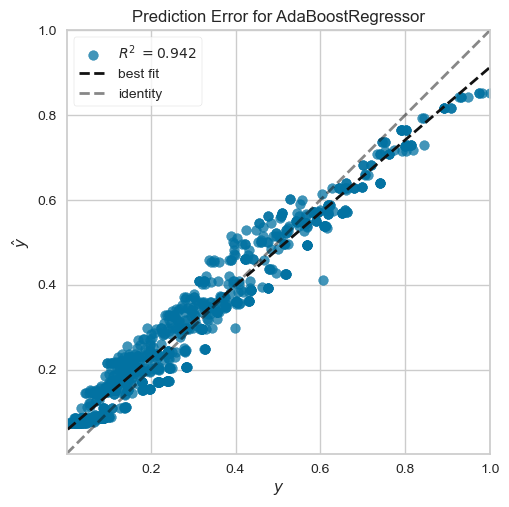

<Axes: title={'center': 'Prediction Error for AdaBoostRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [25]:
visualizer = PredictionError(ada_reg)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

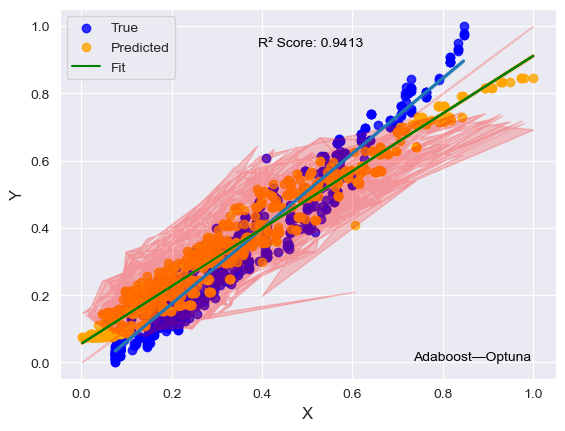

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy import stats

r2 = r2_score(y_test, y_pred)

slope, intercept, _, _, _ = stats.linregress(y_test, y_pred)
fit_line = intercept + slope * y_test

sns.set_style('darkgrid')
sns.regplot(x=y_pred, y=y_test, label='True', scatter_kws={'color': 'blue'})
sns.regplot(x=y_test, y=y_pred, label='Predicted', scatter_kws={'color': 'orange'})
plt.plot(y_test, fit_line, label='Fit', color='green')
plt.fill_between(y_test, y_pred - (y_pred - y_test), y_pred + (y_pred - y_test), alpha=0.2, color='red')

plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.legend()
plt.text(0.95, 0.05, 'Adaboost—Optuna', transform=plt.gca().transAxes, ha='right', color='black')

plt.text(0.4, 0.9, f'R² Score: {r2:.4f}', transform=plt.gca().transAxes, ha='left', color='black')
plt.show()